In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8) 

In [2]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT5lQlwOvNp98bn-IKzuAg_myJUSUmsNWVCROSxIUiDGBg9sG7_yjZ89DTkPYEFZDA7XiWyiwxavB9h/pub?output=csv')
df.head()

,Population,Profit
0,15,1
1,11,3
2,11,9
3,19,4
4,15,7


Text(0.5, 1.0, 'Profit vs City Population')

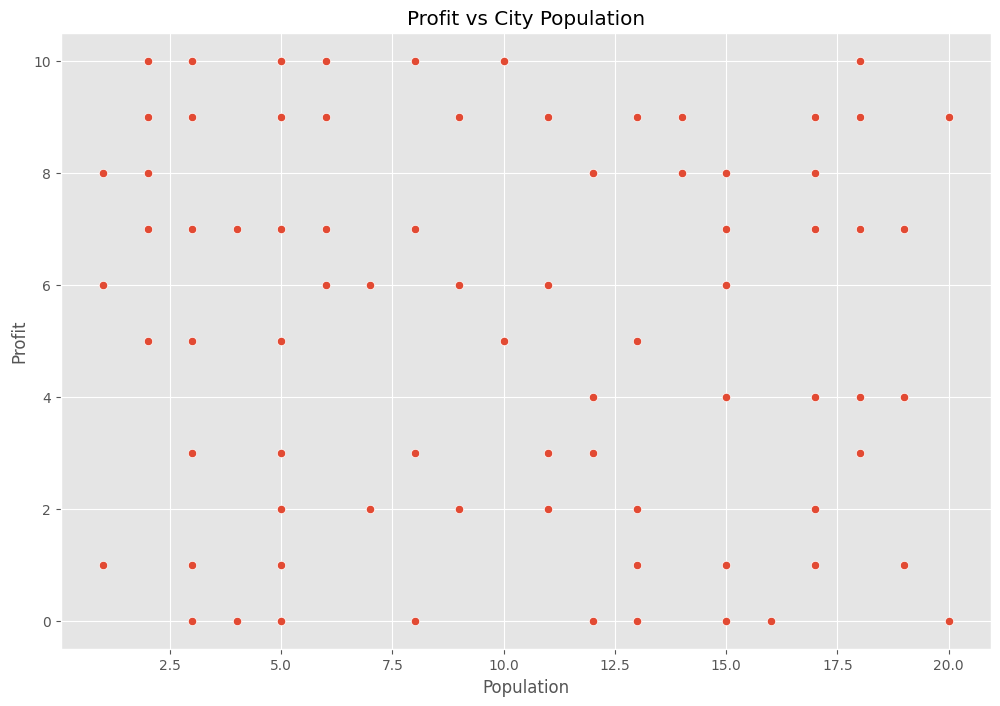

In [3]:
ax=sns.scatterplot(x="Population",y="Profit", data=df)
ax.set_title("Profit vs City Population")

In [4]:
# Calculate Cost Function
def cost_function(x,y,theta):
    m=len(y)
    y_pred=x.dot(theta)
    eror=(y_pred-y)**2

    return 1/(2*m)*np.sum(eror)

In [5]:
m=df.Population.values.size
x=np.append(np.ones((m,1)),df.Population.values.reshape(m,1),axis=1)
y=df.Profit.values.reshape(m,1)
theta=np.zeros((2,1))

cost_function(x,y,theta)

19.567708333333332

In [6]:
# Calculate Gradient
def gradient_descent(x,y,theta,alpha,iterations):
    m=len(y)
    costs=[]
    for i in range(iterations):
        y_pred=x.dot(theta)
        eror=np.dot(x.transpose(),(y_pred-y))
        theta -=alpha/m*eror
        costs.append(cost_function(x,y,theta))
        

    return theta,costs

In [7]:
theta,costs=gradient_descent(x,y,theta,alpha=0.01,iterations=2000)
print("h(x)= {:.2f} + {:.2f}x1".format(round(theta[0,0], 2), round(theta[1,0], 2)))

h(x)= 5.68 + -0.04x1


In [8]:
# Graph
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Define Theta values
theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-1,4,100)
cost_values=np.zeros((len(theta_0),len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t=np.array([theta_0[i],theta_1[j]])
        cost_values[i,j]=cost_function(x,y,t)
        

<function matplotlib.pyplot.show(close=None, block=None)>

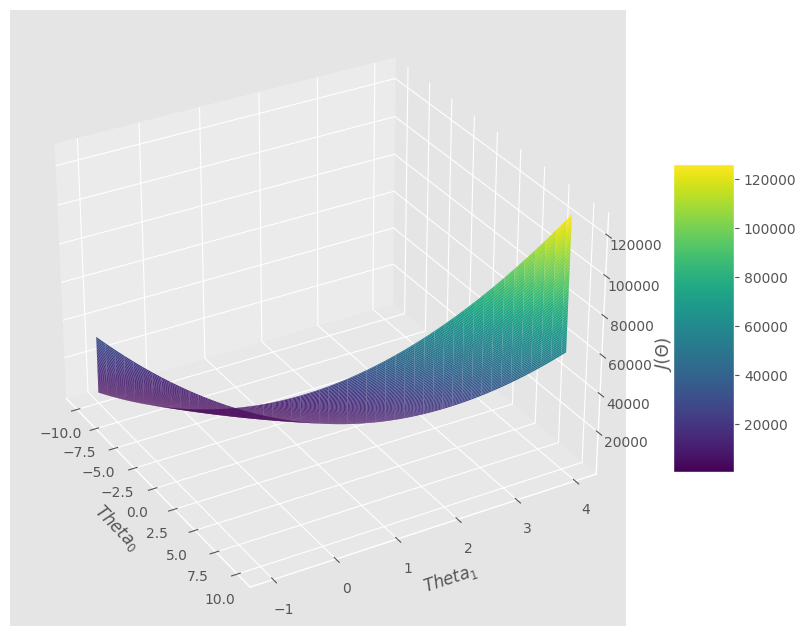

In [10]:
# 3D Plot of theta values
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(projection='3d')

surf=ax.plot_surface(theta_0,theta_1,cost_values,cmap='viridis')
fig.colorbar(surf,shrink=0.5,aspect=5)
plt.xlabel("$Theta_0$")
plt.ylabel("$Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)

plt.show

Text(0.5, 1.0, 'Value of Cost Function vs Iterations of Gradient Descent')

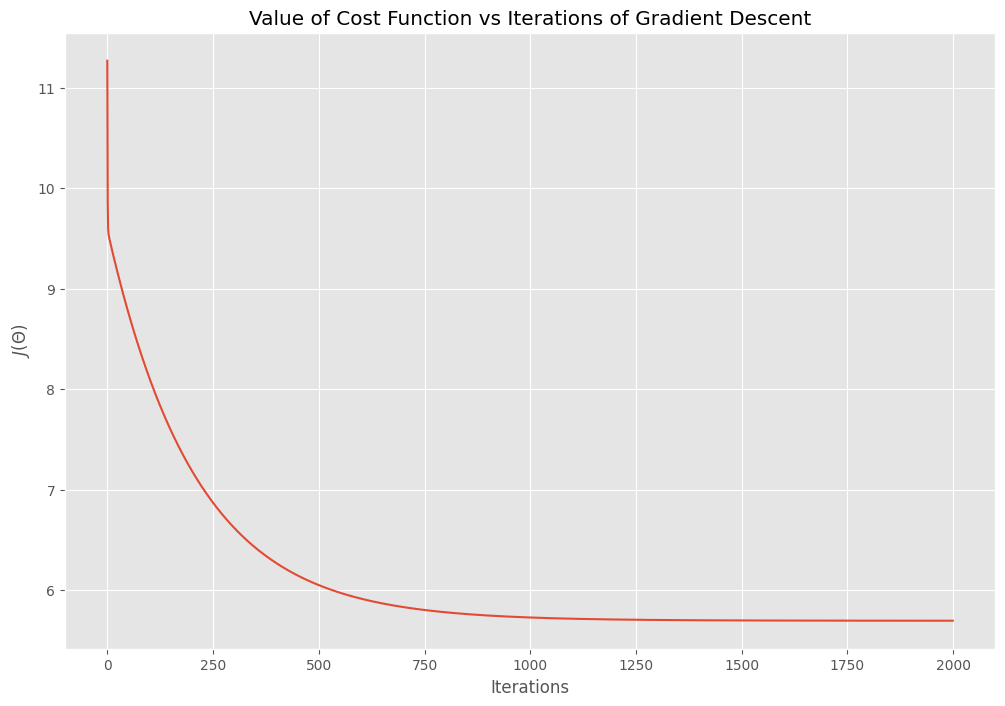

In [11]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Value of Cost Function vs Iterations of Gradient Descent")

In [12]:
theta.shape

(2, 1)

Text(0.5, 1.0, 'Linear Regression')

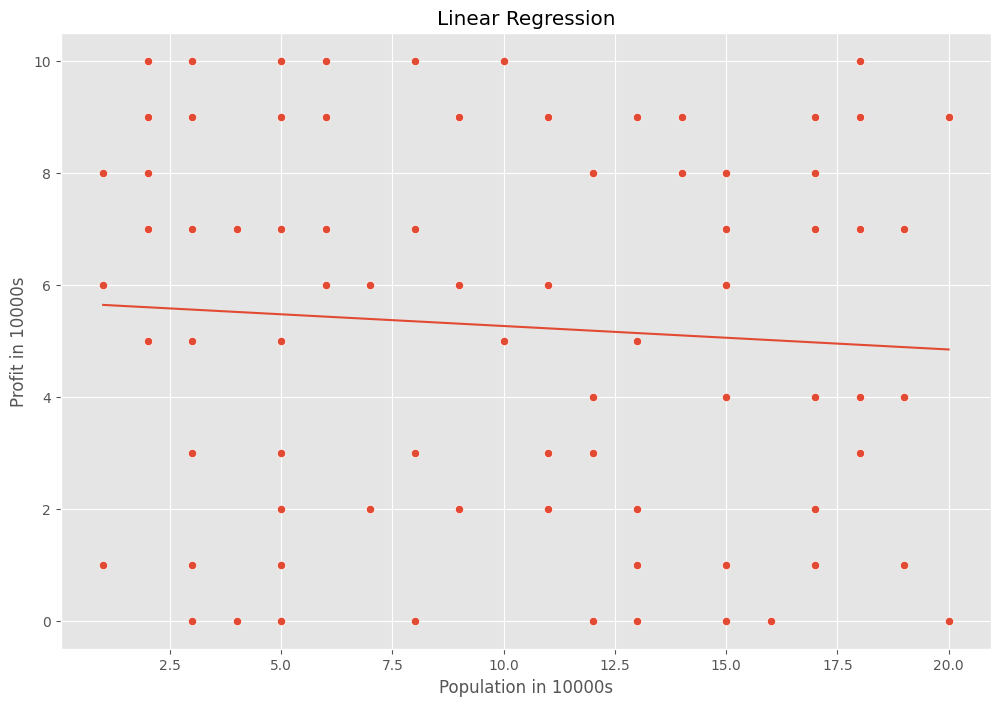

In [26]:
# Linear Regression Graph
theta=np.squeeze(theta)
sns.scatterplot(x="Population",y="Profit", data=df)

x_values=[x for x in df['Population']]
y_values=[(x*theta[1]+theta[0]) for x in x_values]

sns.lineplot(x=x_values,y=y_values)
plt.xlabel("Population in 10000s")
plt.ylabel("Profit in 10000s")
plt.title("Linear Regression")

In [14]:
def predict(x,theta):
    y_pred=np.dot(theta.transpose(),x)

    return y_pred

In [15]:
y_pred_1=predict(np.array([1,50]),theta)*1000
print(y_pred_1)

3586.9318667810553


In [28]:
Profit=np.array(df['Profit'])
y_values=np.array(y_values)
MSE = np.square(np.subtract(Profit,y_values)).mean()
print(MSE)


11.394450711730125


In [29]:
# Calculate residuals
residuals = Profit - y_values

# Calculate sum of squared residuals
SSR = np.sum(residuals**2)

# Calculate mean of true target values
y_true_mean = np.mean(Profit)

# Calculate total sum of squares
SST = np.sum((Profit - y_true_mean)**2)

# Calculate R2 score
R2 = 1 - (SSR / SST)

print("R2:", R2)


R2: 0.006017608078745074
